### CIS 9: Lab 3b
Unsupervised Learning: clustering

You are asked by a car insurance company to help the company adjust the insurance premium that they charge their customers. Currently all customers are charged the same insurance rate, but the company would like to decrease the rate for customers who don't file expensive claims, and raise the rate for those who have high claims.

The company gives you customer data for the year 2020, and asks you to group the customers based on their risks as drivers.<br>
The input data is in `carInsurance.csv`([source](https://www.kaggle.com/datasets/lakshmanraj/vehicle-insurance-policy))

In [2]:
# Name: Aaron Jiang

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from sklearn.cluster import KMeans
import seaborn as sns
plt.style.use('bmh')
%matplotlib inline

1. __Read data from the file `carInsurance.csv`__ into a DataFrame<br>
Then __print the number of rows and columns of the DataFrame__ and __print the first 5 rows__

In [4]:
df = pd.read_csv('carInsurance.csv')
print('# of rows:',df.shape[0],'\n# of columns:',df.shape[1])
df.head()

# of rows: 60392 
# of columns: 15


,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
0,43124327,12/30/2020,F,4.0,7/12/1968,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53
1,21919609,12/30/2020,F,2.0,11/5/1982,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53
3,92175225,12/30/2020,M,4.0,11/2/1960,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53
4,66223239,12/30/2020,F,4.0,1/4/1968,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53


2. Some of the columns are not needed or are duplicate of other columns<br>
__Remove the following columns__:
- The policy effective date (`pol_eff_dt`): are all for the year 2020
- The `date_of_birth`: corresponds to the age cat (`agecat`)
- The `area`: is not as significant as the `traffic_index`
- The `claim_office`: has no influence on how much insurance claim is made by the customer
- The `annual_premium`: is currently the same for all customers
- And one more column that doesn't provide the ML model with patterns in the data

Use Jupyter Notebook print to __print the resulting DataFrame__

In [5]:
temp = df.columns.str.extract('(pol|date|area|office|premium)').dropna().index 
df = df.drop(columns=df.columns[temp]) # got rid of pol #, does not provide model with info
df

,gender,agecat,credit_score,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0
0,F,4.0,381.0,133.6,2,HBACK,1.331,0,0.0
1,F,2.0,549.0,163.6,1,UTE,3.740,0,0.0
2,M,2.0,649.0,117.5,4,COUPE,0.880,0,0.0
3,M,4.0,743.0,100.7,3,SEDAN,1.045,0,0.0
4,F,4.0,817.0,115.5,4,HBACK,0.473,0,0.0
...,...,...,...,...,...,...,...,...,...
60387,F,5.0,809.0,145.5,4,HBACK,0.891,0,0.0
60388,M,4.0,681.0,86.3,1,HBACK,1.881,0,0.0
60389,M,4.0,773.0,110.0,1,STNWG,5.170,0,0.0
60390,M,3.0,714.0,NaN,1,HBACK,1.903,0,0.0


3. __Show the number of NaN in each columns__.<br>
Then __drop rows with NaN__ and __print the number of remaining rows and columns__

In [6]:
print(df.isna().sum())
df = df.dropna(axis=0)
print('\n# of rows:',df.shape[0],'\n# of columns:',df.shape[1])

gender              0
agecat           4831
credit_score     2801
traffic_index    3503
veh_age             0
veh_body            0
veh_value           0
numclaims           0
claimcst0           0
dtype: int64

# of rows: 49919 
# of columns: 9


4. The dataset is still large enough to continue with it.<br>
__Change the `gender` and `veh_body` to numeric data__<br>
Then __print the first 5 rows of the resulting DataFrame__

In [7]:
labels = dict(zip(df.veh_body.unique(), range(df.veh_body.nunique())))
df.gender = df.gender.apply(lambda x: int(x =='F'))  # 0 is male, 1 is female
df.veh_body = df.veh_body.apply(lambda x: labels[x])
df.head()

/Users/aaronjiang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,gender,agecat,credit_score,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0
0,1,4.0,381.0,133.6,2,0,1.331,0,0.0
1,1,2.0,549.0,163.6,1,1,3.740,0,0.0
2,0,2.0,649.0,117.5,4,2,0.880,0,0.0
3,0,4.0,743.0,100.7,3,3,1.045,0,0.0
4,1,4.0,817.0,115.5,4,0,0.473,0,0.0


5. __Create a plot with subplots to observe the correlation, if any, of each column and the `claimcst0`__, which is the insurance claim amount.<br>
The higher the claim, the more costly the customer is to the company.

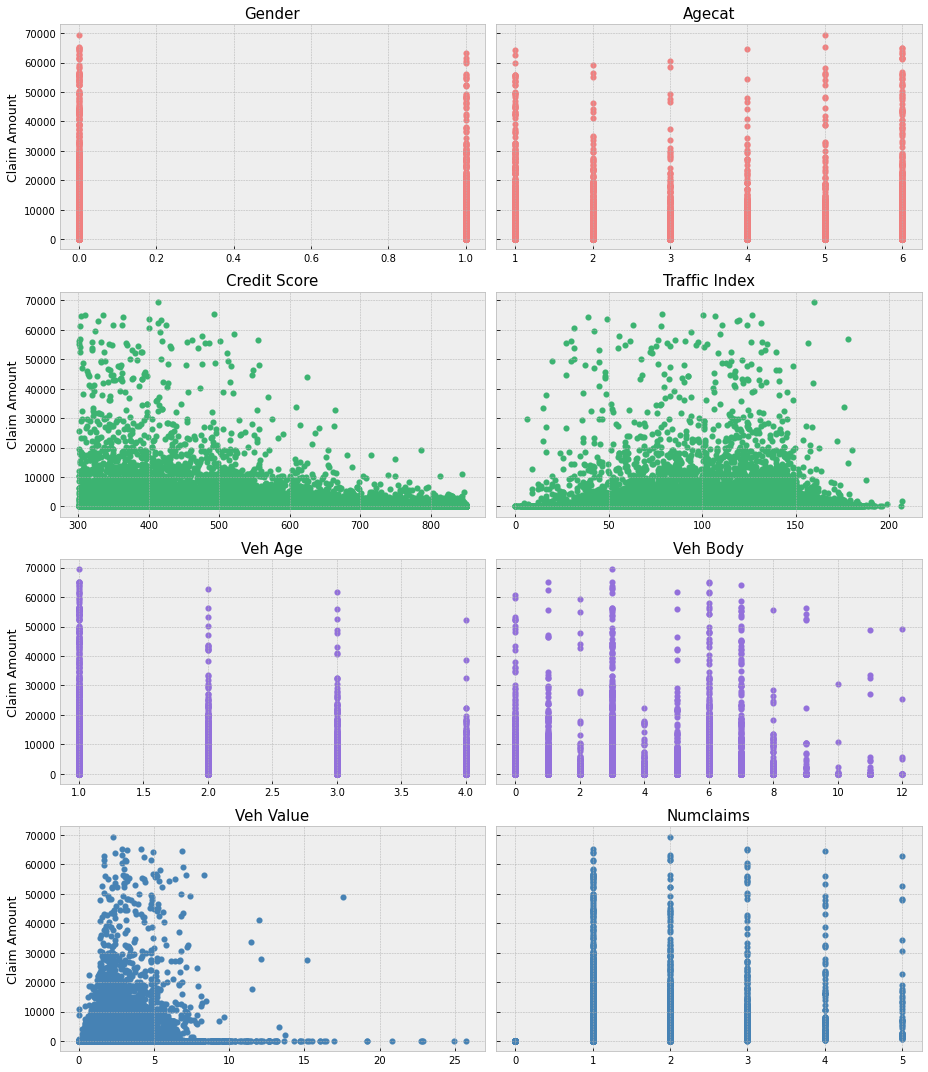

In [8]:
fig, axs = plt.subplots(4,2, figsize=(13,15),sharey=True, tight_layout=True)
fig.patch.set_facecolor('white')
myit = iter(df.columns[:len(df.columns)-1])
colors = iter(['lightcoral','mediumseagreen','mediumpurple','steelblue'])
for i in range(len(axs)):
    axs[i][0].set_ylabel('Claim Amount', fontsize=12.5)
    cl = next(colors)
    for j in range(len(axs[i])):
        title = next(myit)
        axs[i][j].set_title(str(title).replace('_',' ').title(), fontsize=15)
        axs[i][j].scatter(df[title], df.claimcst0, lw=0.1, color=cl)
plt.show()

6. Based on the subplots, __remove columns that don't have much correlation to the claim amount__.<br>
Then __show the first 5 rows of the resulting DataFrame__

In [9]:
data = df.copy()  # for last question
temp = df.corrwith(df.claimcst0).drop(index=['claimcst0'])
df = df.drop(columns = temp[abs(temp) < .1].index)
df.head()


,credit_score,veh_age,veh_value,numclaims,claimcst0
0,381.0,2,1.331,0,0.0
1,549.0,1,3.740,0,0.0
2,649.0,4,0.880,0,0.0
3,743.0,3,1.045,0,0.0
4,817.0,4,0.473,0,0.0


7. __Use k-Means Clustering to group the customers based on their claim amount__.<br>
You will need to create more than one Code cells.<br> 
In the last Code cell, __print each cluster number and the mean claim amount of customers in that cluster__

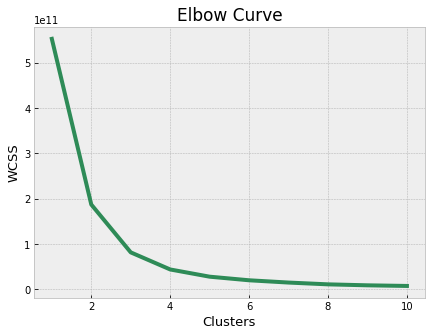

In [10]:
X = df.copy()
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=30, n_init=10,random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize=(7,5))
fig.patch.set_facecolor('white')
plt.plot(np.arange(1,11),wcss, color='seagreen', lw=4)
plt.title('Elbow Curve',fontsize=17)
plt.xlabel('Clusters', fontsize=13)
plt.ylabel('WCSS', fontsize=13)
plt.show()   # sharpest inflection at (3) clusters

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
cf = pd.DataFrame({'row':X.index.values,'cluster':y_kmeans})

In [12]:
print('Mean Claim Amounts')
for i in range(cf.cluster.nunique()):
    ind = cf[cf.cluster == i].row
    print('Cluster ' + str(i+1), ': ', np.round(df.loc[ind].claimcst0.mean(),2), sep='')

Mean Claim Amounts
Cluster 1: 206.53
Cluster 2: 42146.84
Cluster 3: 11445.45


8. Further prove that your clusters are partitioned correctly by plotting the distribution of claim amounts of each cluster.<br>
__Create a plot with subplots to show the claim amount `cst0` distribution of each cluster__<br>
Make sure to have a title for each subplot.

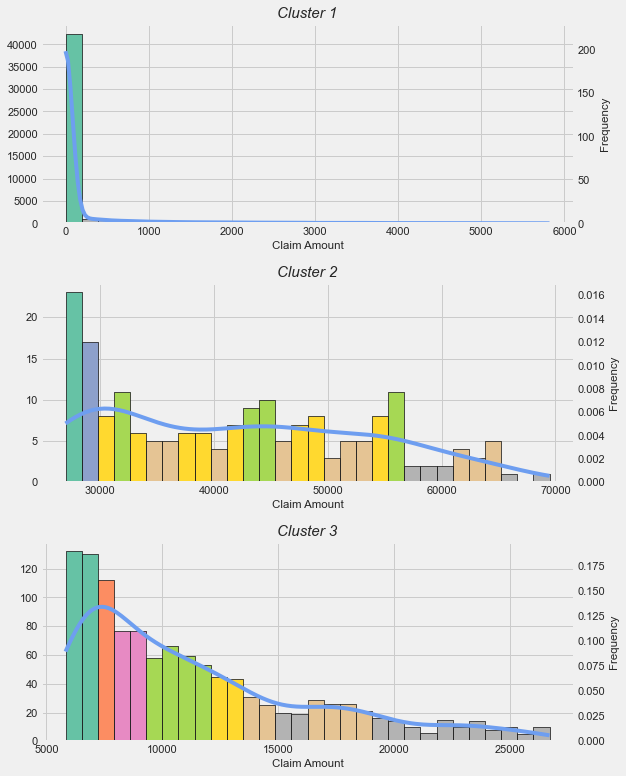

In [17]:
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(3,1, figsize=(9,11), tight_layout=True)

def coloring(n, patches):
    height = n / n.max()
    norm = clr.Normalize(height.min(),height.max())
    for bar_height, bar in zip(height, patches):
        bar.set_facecolor(plt.cm.get_cmap('Set2_r')(norm(bar_height)))

for i in range(len(axs)):
    curr = df[y_kmeans==i].claimcst0
    axs[i].set_title('Cluster ' + str(i+1), fontsize=15, fontstyle='italic')
    axs[i].set_xlabel('Claim Amount',fontsize=11.5)
    ax2 = axs[i].twinx()
    ax2.grid(None)
    ax2.set_ylabel('Frequency',fontsize=11.5)
    sns.histplot(curr,kde=True,color='#6e9ef0',stat='frequency',bins=30,ec='k',alpha=0,ax=ax2)
    n, bins, patches = axs[i].hist(curr, bins=30, ec='k')
    coloring(n, patches)
    
plt.show()

9. Create new Code cells as needed to provide data to answer the following questions from the insurance company:
- Which cluster has the highest number of customers?
- Observe the characteristics of the customers in each cluster and comment on <u>each</u> of the following attributes:<br>
gender, age, credit score, vehicle age, vehicle value, and number of claims.<br>

Examples of an observation: _there is not much age difference between the clusters_ (make sure your Code has proof of this)<br>
Or: _the vehicle value tends to be lower for the customers with low claim amount, and gets higher with high claim amount_ (make sure your Code cells show these numbers)

__Create a Raw NBConvert cell for your answers the questions above__

In [14]:
totals = [len(cf[cf.cluster == i]) for i in range(cf.cluster.nunique())]
for i in range(cf.cluster.nunique()):
    if len(cf[cf.cluster == i]) == max(totals):
        print('Cluster #' + str(i+1) + ' has the most customers at', f'{max(totals):,}.')
    else:
        print('Cluster #' + str(i+1) + ':', f'{len(cf[cf.cluster == i]):,}')

Cluster #1 has the most customers at 48,563.
Cluster #2: 189
Cluster #3: 1,167


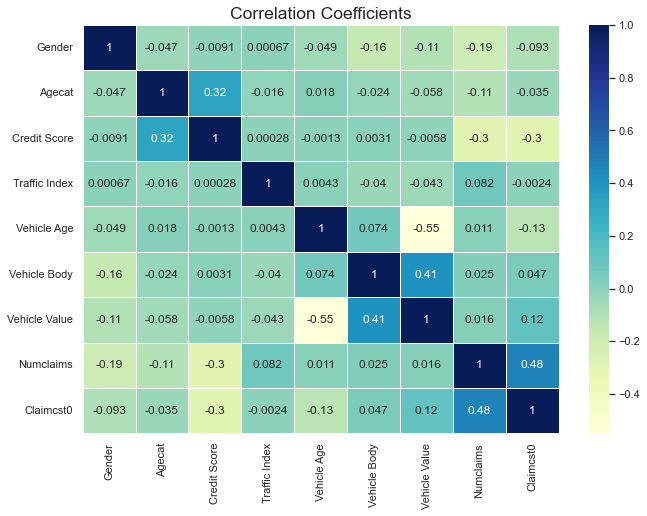

In [15]:
sns.set(rc={'figure.figsize':(9.5,7)})
data.columns = data.columns.str.replace('_', ' ').str.replace('veh', 'vehicle').str.title()
h = sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', linewidth=.5)
h.set_title('Correlation Coefficients', fontsize=17.5)
plt.show()

In [16]:
print('Males:',len(data[data.Gender == 0]),'\nFemales:',len(data[data.Gender == 1])) 
avgs = pd.DataFrame()
for i in range(cf.cluster.nunique()):
    curr = data.loc[cf[cf.cluster==i].row].drop(columns=data.columns[0]) # drop gender 
    avgs['Cluster '+str(i+1)] = pd.Series([np.round(curr[i].mean(),2) for i in curr.columns])
avgs.index = data.columns[1:]
avgs

Males: 21488 
Females: 28431


,Cluster 1,Cluster 2,Cluster 3
Agecat,3.57,3.47,3.28
Credit Score,668.69,395.58,439.49
Traffic Index,103.90,95.17,104.12
Vehicle Age,2.70,1.33,1.95
Vehicle Body,2.96,4.26,3.47
Vehicle Value,1.92,3.80,2.71
Numclaims,0.17,1.87,1.56
Claimcst0,206.53,42146.84,11445.45
